In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

In [2]:
data = pd.read_csv('../data/preprocessed_data.csv')

In [3]:
data.shape

(10411, 48)

In [4]:
data.columns

Index(['benchmarks', 'input-size', 'threads', 'branch-instructions',
       'branch-misses', 'cache-misses', 'cache-misses-percent',
       'cache-references', 'cpu-cycles', 'instructions',
       'instructions_per_cycle', 'idle-cycles-backend',
       'idle-cycles-backend-percent', 'idle-cycles-frontend',
       'idle-cycles-frontend-percent', 'context-switches', 'cpu-clock',
       'cpu-used', 'cpu-migrations', 'major-faults', 'minor-faults',
       'page-faults', 'task-clock', 'L1-dcache-load-misses',
       'L1-dcache-load-misses-percent', 'L1-dcache-loads',
       'L1-dcache-prefetch-misses', 'L1-dcache-prefetches',
       'L1-icache-load-misses', 'L1-icache-load-misses-percent',
       'L1-icache-loads', 'L1-icache-prefetches', 'LLC-load-misses',
       'LLC-load-misses-percent', 'LLC-loads', 'LLC-stores',
       'branch-load-misses', 'branch-loads', 'dTLB-load-misses',
       'dTLB-load-misses-percent', 'dTLB-loads', 'iTLB-load-misses',
       'iTLB-load-misses-percent', 'iTLB-l

In [5]:
benchmarks = pd.read_csv("../data/dataset.csv")['benchmarks'].unique()
input_sizes = pd.read_csv("../data/dataset.csv")['input-size'].unique()

In [6]:
def find_avg(input_size, benchmark, data):
    s = [0 for i in range(16)]
    count = [0 for i in range(16)]
    for i in range(len(data['benchmarks'])):
        if data['benchmarks'][i] == benchmark and data['input-size'][i] == input_size:
            s[data['threads'][i]-1] += data['time'][i]
            count[data['threads'][i]-1] += 1
    return pd.Series(s)/pd.Series(count)

In [7]:
def find_diff(size_1, size_2, benchmark, data):
    return find_avg(size_1,benchmark,data)-find_avg(size_2,benchmark,data)

In [8]:
def func(n, s, p):
    return s + p/n  

In [9]:
def solve_func(seq_1, seq_2, s_diff, p_diff):
    s_2 = s_diff/((seq_1/seq_2)-1)
    s_1 = seq_1 / seq_2 * s_2
    p_1 = seq_1 - s_1
    p_2 = seq_2 - s_2
    
    return s_1, s_2, p_1, p_2
    

f(x)=0.0501+0.4185/x


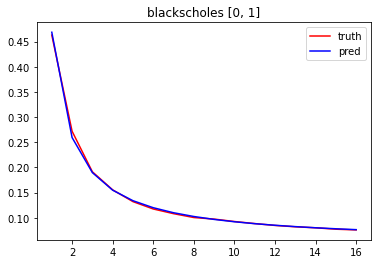

f(x)=0.202+1.669/x


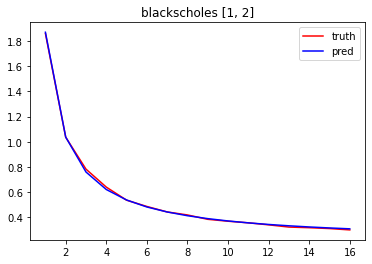

f(x)=0.2521+2.0875/x


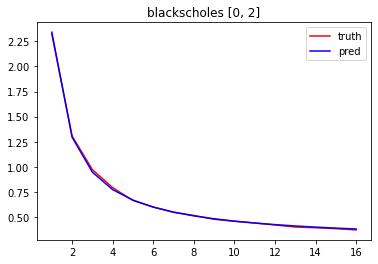

f(x)=0.098+0.84/x


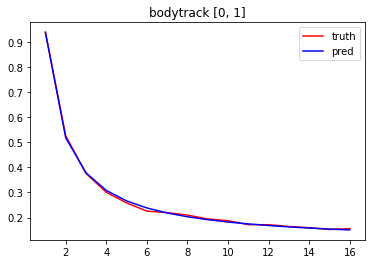

f(x)=0.2335+3.1666/x


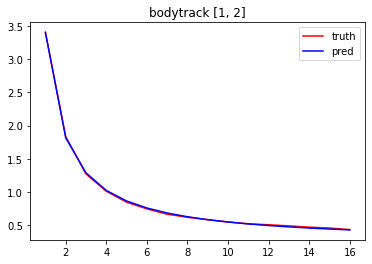

f(x)=0.3316+4.0066/x


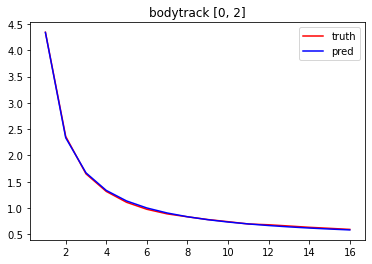

f(x)=1.7344+1.626/x


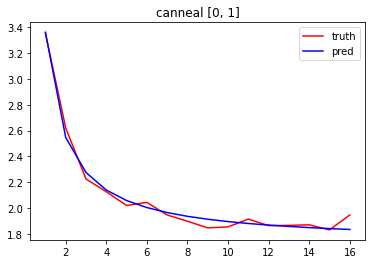

f(x)=3.8904+3.3347/x


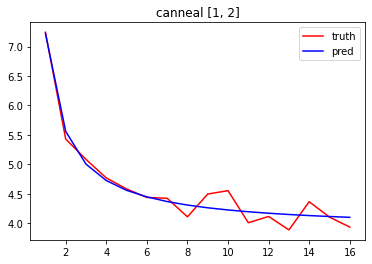

f(x)=5.6247+4.9607/x


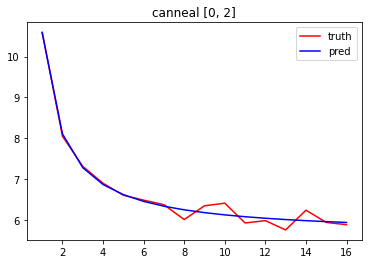

f(x)=0.4941+1.1678/x


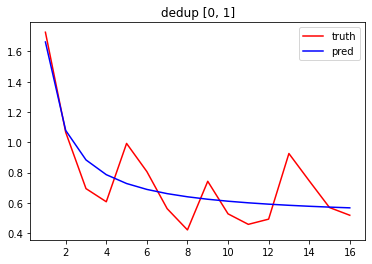

f(x)=2.9377+8.758/x


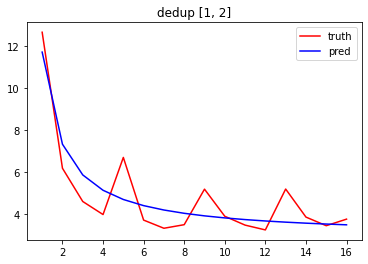

f(x)=3.4319+9.9259/x


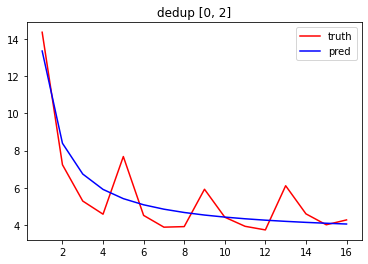

f(x)=0.0446+-0.2743/x


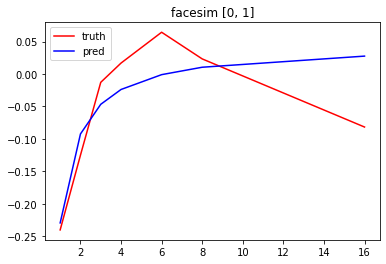

f(x)=-0.043+0.3018/x


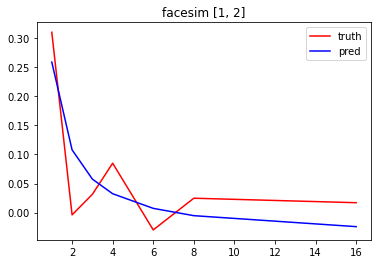

f(x)=0.0016+0.0275/x


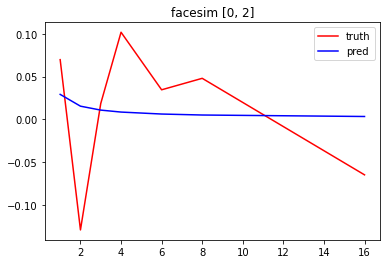

f(x)=0.1495+0.7675/x


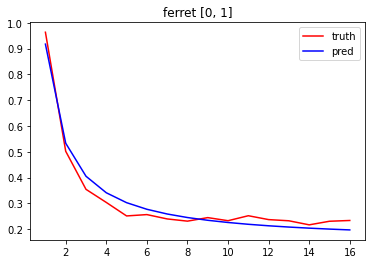

f(x)=0.4453+3.9781/x


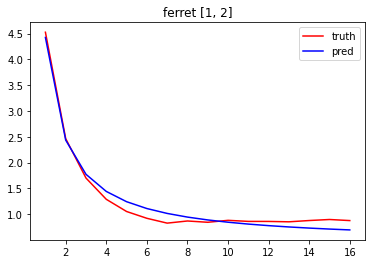

f(x)=0.5948+4.7456/x


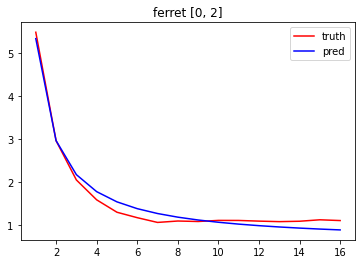

f(x)=0.18+0.61/x


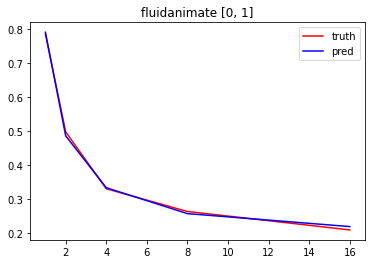

f(x)=0.6781+2.0145/x


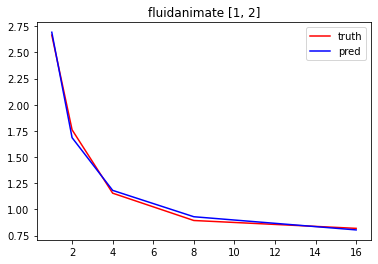

f(x)=0.8581+2.6244/x


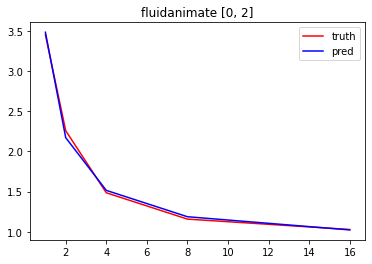

f(x)=0.3677+1.8449/x


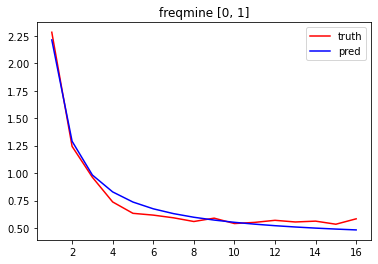

f(x)=0.7229+7.2748/x


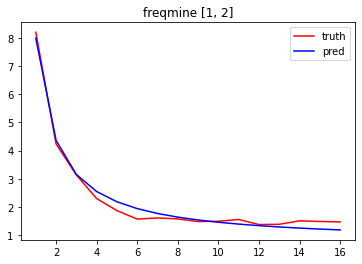

f(x)=1.0907+9.1197/x


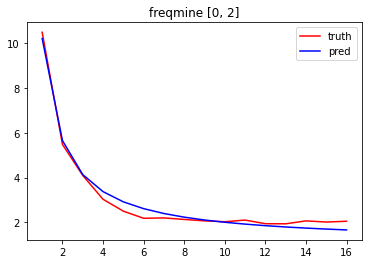

f(x)=0.1515+1.2963/x


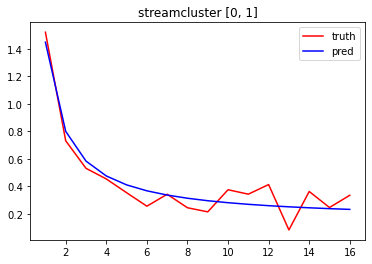

f(x)=0.4069+7.6134/x


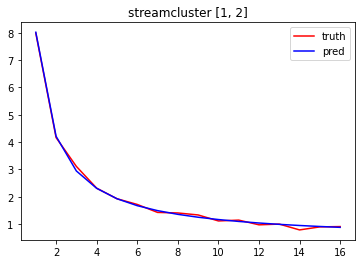

f(x)=0.5584+8.9097/x


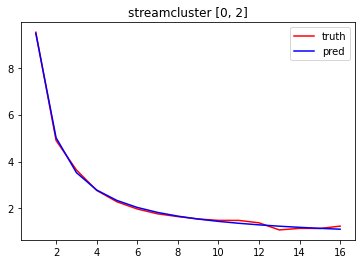

f(x)=0.0409+2.4442/x


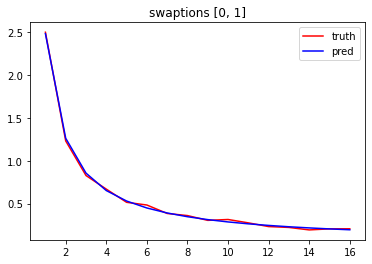

f(x)=0.0902+9.9379/x


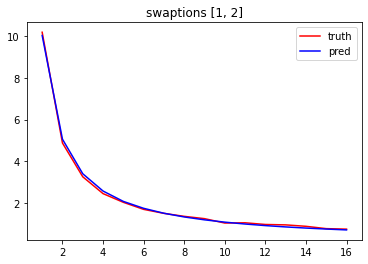

f(x)=0.1311+12.3821/x


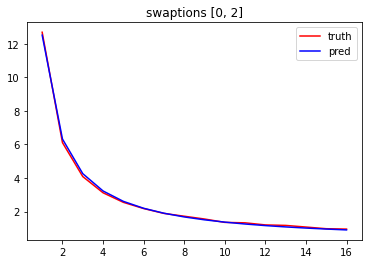

f(x)=0.1486+2.1755/x


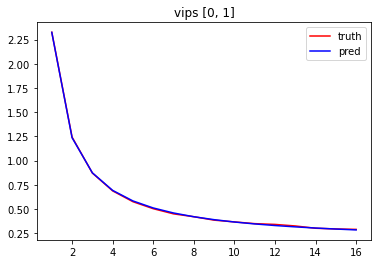

f(x)=0.3587+5.6255/x


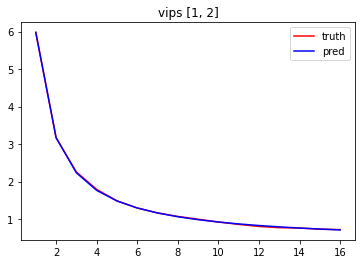

f(x)=0.5073+7.801/x


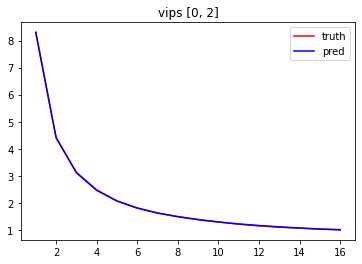

f(x)=0.1218+0.899/x


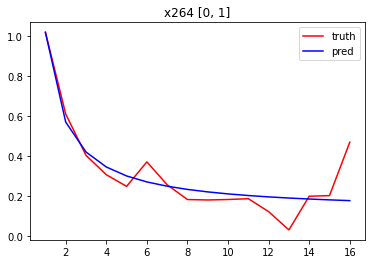

f(x)=0.208+2.8065/x


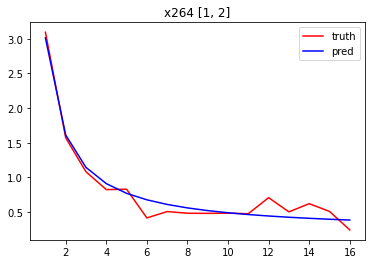

f(x)=0.3298+3.7055/x


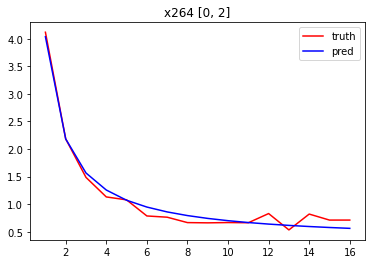

f(x)=0.0274+1.1127/x


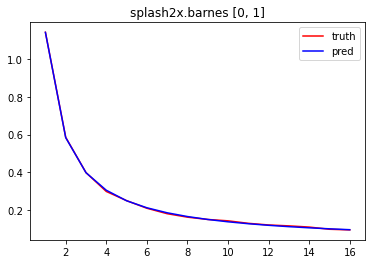

f(x)=0.3872+17.0406/x


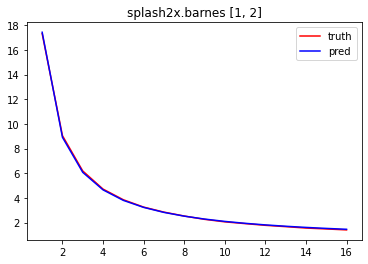

f(x)=0.4146+18.1533/x


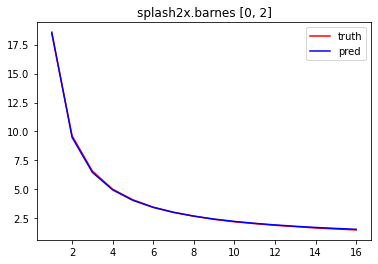

f(x)=0.0005+0.0001/x


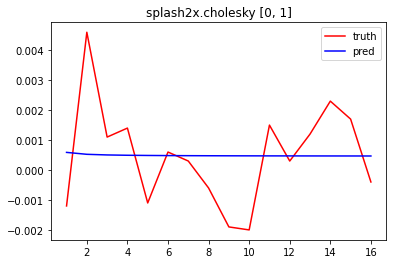

f(x)=-0.0001+-0.0008/x


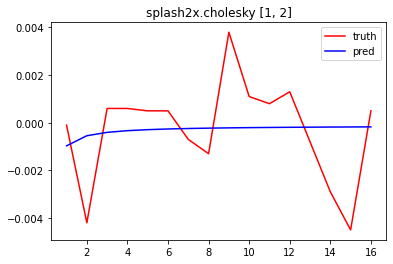

f(x)=0.0003+-0.0007/x


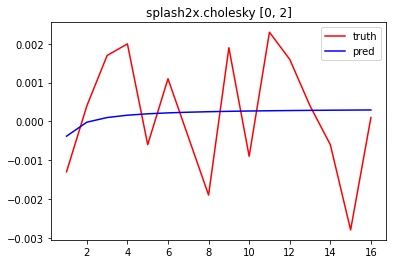

f(x)=0.5822+0.4247/x


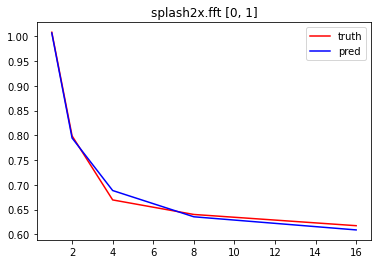

f(x)=2.2095+2.1115/x


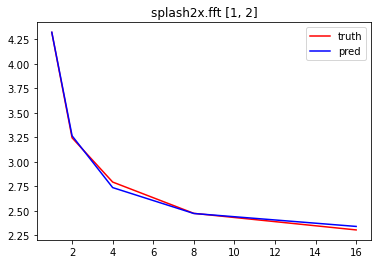

f(x)=2.7918+2.5362/x


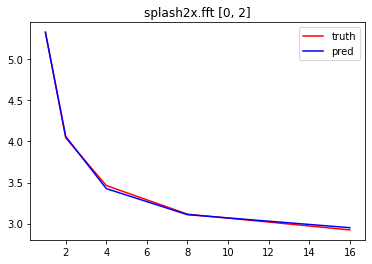

f(x)=0.1222+1.5502/x


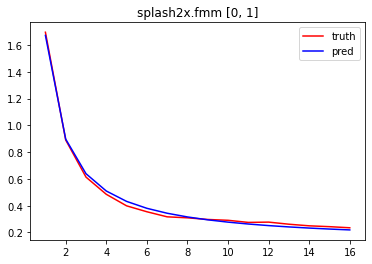

f(x)=0.4234+6.4263/x


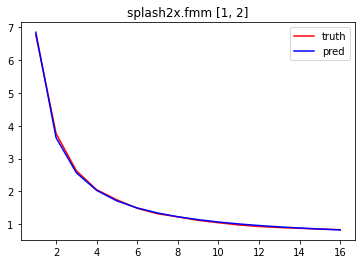

f(x)=0.5457+7.9765/x


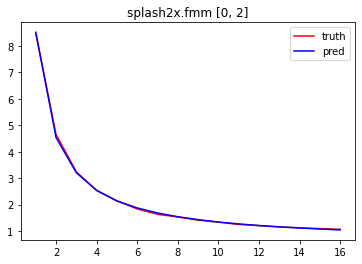

f(x)=0.1351+0.567/x


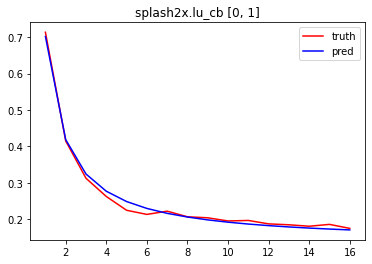

f(x)=0.4981+4.9101/x


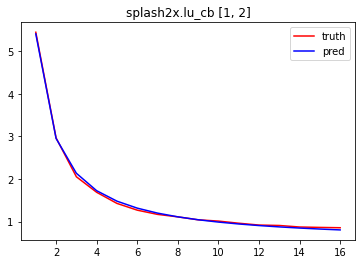

f(x)=0.6332+5.4771/x


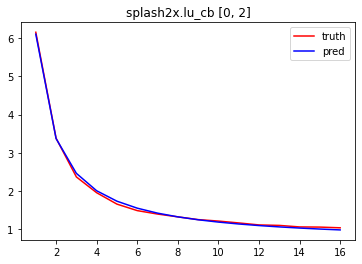

f(x)=0.1712+0.9258/x


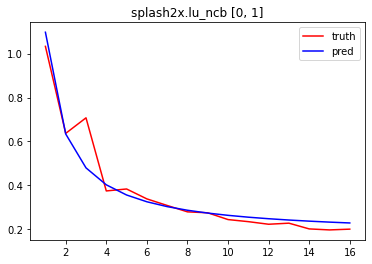

f(x)=0.9251+9.7864/x


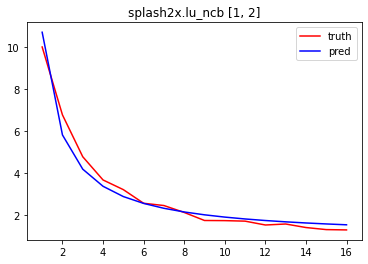

f(x)=1.0963+10.7123/x


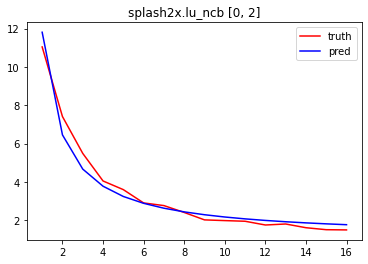

f(x)=0.1449+2.1829/x


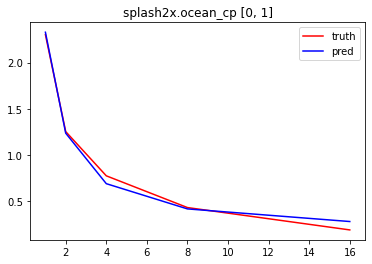

f(x)=1.1867+7.139/x


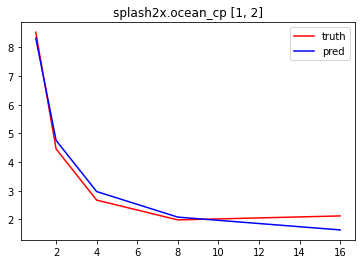

f(x)=1.3316+9.322/x


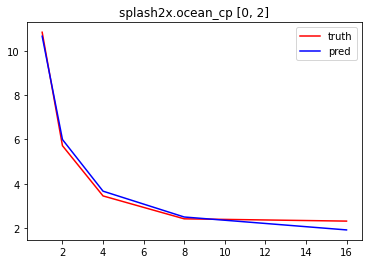

f(x)=0.0842+1.9718/x


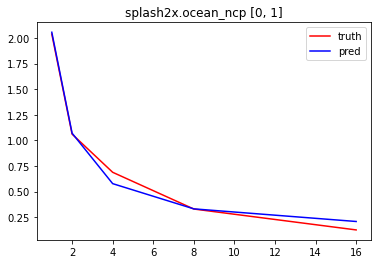

f(x)=1.0783+7.1376/x


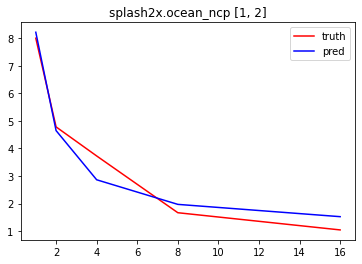

f(x)=1.1625+9.1094/x


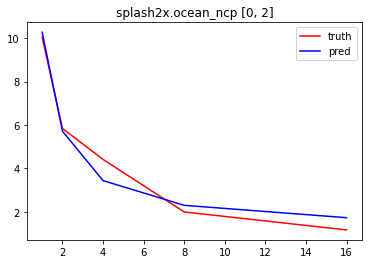

f(x)=0.0864+2.8584/x


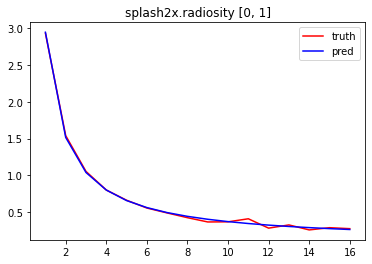

f(x)=2.8419+18.4611/x


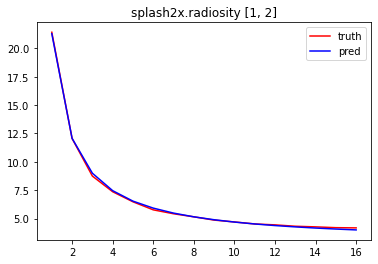

f(x)=2.9283+21.3195/x


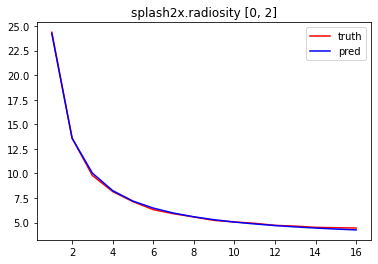

f(x)=-0.2317+2.7581/x


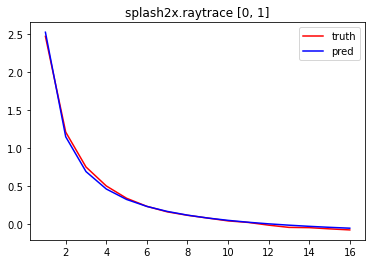

f(x)=0.1303+9.5621/x


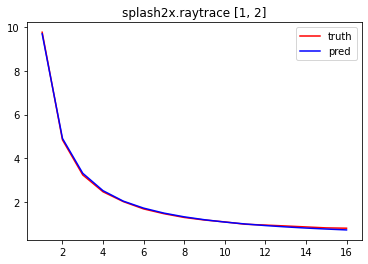

f(x)=-0.1015+12.3202/x


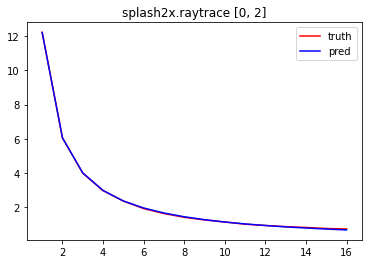

f(x)=0.507+2.7118/x


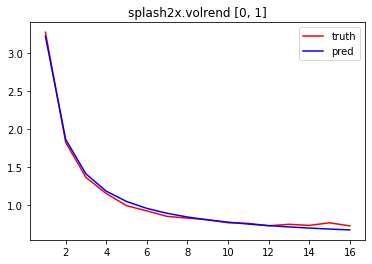

f(x)=0.6461+2.3085/x


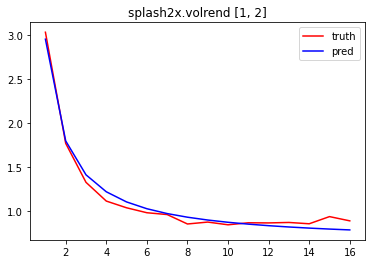

f(x)=1.1532+5.0203/x


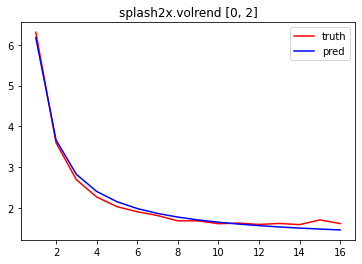

f(x)=0.1396+3.6799/x


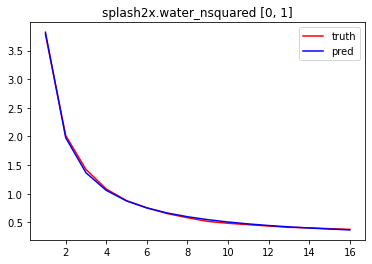

f(x)=0.4494+17.9105/x


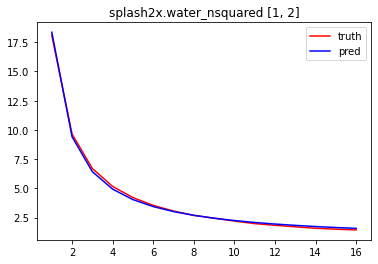

f(x)=0.589+21.5904/x


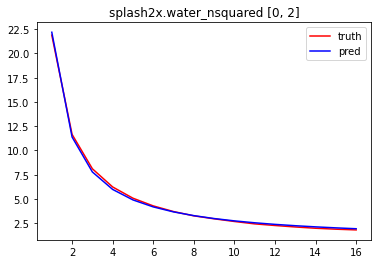

f(x)=0.0718+1.0086/x


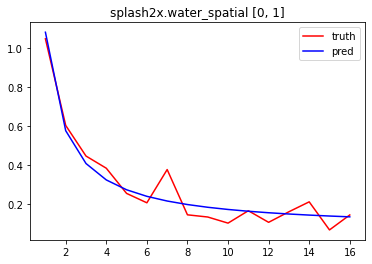

f(x)=0.6008+6.6855/x


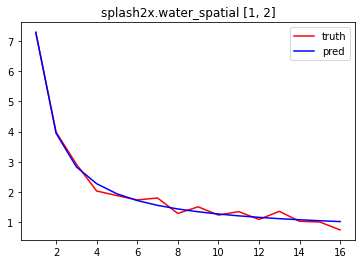

f(x)=0.6726+7.6941/x


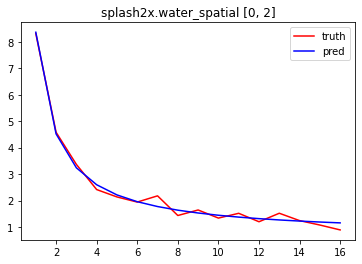

In [10]:
for i in data['benchmarks'].unique():
    for j in [[0,1],[1,2],[0,2]]:
        y = find_diff(j[1],j[0],i,data)
        y_hat = y[y.notna()]
        X_hat = pd.Series([i for i in range(1,17)])[y.notna()]
        
        X = np.array(X_hat)
        y = np.array(y_hat)
        
        popt, _ = curve_fit(func, X, y, maxfev=int(1e8))
        seq_1 = find_avg(j[1], i, data)[0]
        seq_2 = find_avg(j[0], i, data)[0]
        s, p= popt
        
        print('f(x)='+str(round(s,4))+'+'+str(round(p,4))+'/x')
        
        plt.plot(X_hat,y_hat, label="truth", color="red")
        plt.plot(X, func(X, s, p), label="pred", color = "blue")
        plt.legend()
        plt.title(benchmarks[i]+' '+str(j))
        plt.show()

In [11]:
table = [[[0,0,0],[0,0,0]] for i in range(len(benchmarks))]

for i in data['benchmarks'].unique():
    for j in [[0,1],[1,2],[0,2]]:
        y = find_diff(j[1],j[0],i,data)
        y_hat = y[y.notna()]
        X_hat = pd.Series([i for i in range(1,17)])[y.notna()]
        
        X = np.array(X_hat)
        y = np.array(y_hat)
        
        popt, _ = curve_fit(func, X, y, maxfev=int(1e8))
        s, p= popt
        
        seq_1 = find_avg(j[1], i, data)[0]
        seq_2 = find_avg(j[0], i, data)[0]
        s_1, s_2, p_1, p_2 = solve_func(seq_1, seq_2, s, p)
        
        print('\n'+benchmarks[i]+str(j))
        print(input_sizes[j[1]]+' - s='+str(s_1)+' - p='+str(p_1))
        print(input_sizes[j[0]]+' - s='+str(s_2)+' - p='+str(p_2))
        
        table[i][0][j[1]] += s_1
        table[i][1][j[1]] += p_1
        table[i][0][j[0]] += s_2
        table[i][1][j[0]] += p_2


blackscholes[0, 1]
simmedium - s=0.0680794180831702 - p=0.5613205819168299
simsmall - s=0.018009569607321 - p=0.148490430392679

blackscholes[1, 2]
simlarge - s=0.2702956811943579 - p=2.220004318805642
simmedium - s=0.06831470174024369 - p=0.5610852982597564

blackscholes[0, 2]
simlarge - s=0.2701102403386106 - p=2.2201897596613893
simsmall - s=0.018059412527156836 - p=0.14844058747284317

bodytrack[0, 1]
simmedium - s=0.15027215586259102 - p=1.2879278441374091
simsmall - s=0.05223268718934033 - p=0.44766731281065975

bodytrack[1, 2]
simlarge - s=0.3322085810999482 - p=4.510291418900051
simmedium - s=0.09866440502590515 - p=1.339535594974095

bodytrack[0, 2]
simlarge - s=0.3697540182836125 - p=4.472745981716387
simsmall - s=0.038170373513676394 - p=0.46172962648632365

canneal[0, 1]
simmedium - s=2.7649044908214857 - p=2.5794955091785146
simsmall - s=1.0305534289567395 - p=0.9614465710432603

canneal[1, 2]
simlarge - s=6.760999168450134 - p=5.826400831549865
simmedium - s=2.8706074293


splash2x.raytrace[0, 1]
simmedium - s=-0.3084838768734439 - p=3.598583876873444
simsmall - s=-0.0767342040768446 - p=0.8951342040768445

splash2x.raytrace[1, 2]
simlarge - s=0.17419086859144053 - p=12.880909131408561
simmedium - s=0.04389896490664173 - p=3.2462010350933586

splash2x.raytrace[0, 2]
simlarge - s=-0.10824333494645667 - p=13.163343334946457
simsmall - s=-0.006785573861569818 - p=0.8251855738615698

splash2x.volrend[0, 1]
simmedium - s=0.5762309463733035 - p=3.1412690536266963
simsmall - s=0.06919421505340757 - p=0.3772057849465924

splash2x.volrend[1, 2]
simlarge - s=1.4378983542174173 - p=5.313201645782582
simmedium - s=0.7917801738684436 - p=2.925719826131556

splash2x.volrend[0, 2]
simlarge - s=1.2348032623729337 - p=5.516296737627066
simsmall - s=0.08164835009454424 - p=0.3647516499054557

splash2x.water_nsquared[0, 1]
simmedium - s=0.14544512679572513 - p=3.7989548732042744
simsmall - s=0.005870313402768341 - p=0.15332968659723165

splash2x.water_nsquared[1, 2]
simla

In [12]:
for i in range(len(table)):
    for j in range(len(table[i])):
        table[i][j] = list((pd.Series(table[i][j])/2).round(decimals = 2))

In [13]:
# [simsmall, simmedian, simlarge]
df_table = pd.DataFrame(table)
df_table.index = benchmarks
df_table.columns = ['s_val','p_val']
df_table

,s_val,p_val
blackscholes,"[0.02, 0.07, 0.27]","[0.15, 0.56, 2.22]"
bodytrack,"[0.05, 0.12, 0.35]","[0.45, 1.31, 4.49]"
canneal,"[1.04, 2.82, 6.72]","[0.95, 2.53, 5.87]"
dedup,"[0.24, 0.68, 3.6]","[0.67, 1.95, 11.67]"
facesim,"[-0.77, -1.51, -0.55]","[10.29, 10.79, 10.14]"
ferret,"[0.07, 0.19, 0.62]","[0.46, 1.3, 5.39]"
fluidanimate,"[0.15, 0.34, 1.02]","[0.46, 1.05, 3.04]"
freqmine,"[0.11, 0.39, 1.09]","[0.73, 2.74, 10.24]"
streamcluster,"[0.03, 0.14, 0.54]","[0.36, 1.77, 9.36]"
swaptions,"[0.01, 0.04, 0.13]","[0.87, 3.34, 13.44]"


In [14]:
def plotting(input_size, data):
    lst = []
    data = data[data['input-size']==input_size]
    data = data.reset_index()
    
    X = [[] for j in data['benchmarks'].unique()]
    y = [[] for j in data['benchmarks'].unique()]

    for i in range(len(data['benchmarks'])):
        X[data['benchmarks'][i]].append(data['threads'][i])
        y[data['benchmarks'][i]].append(data['time'][i])


    for i in data['benchmarks'].unique():
        axis[i].plot(X[i],y[i],'.')
        axis[i].set_xlabel('threads',loc='right')
        axis[i].set_ylabel('time',loc='top')
        axis[i].set_title(benchmarks[i],c='red')
        axis[i].legend(input_sizes)

In [15]:
data = data[data['benchmarks'] != 13]
data = data[data['benchmarks'] != 4]
data = data.reset_index()
data.shape

(9721, 49)

In [16]:
vanilla = [0 for i in range(len(data['benchmarks']))]
s_1 = [0 for i in range(len(data['benchmarks']))]
p_1 = [0 for i in range(len(data['benchmarks']))]

for i in range(len(data['benchmarks'])):
    b_idx = data['benchmarks'][i]
    input_idx = data['input-size'][i]
    s = max(0,pd.DataFrame(table)[0][b_idx][input_idx])
    p = max(0,pd.DataFrame(table)[1][b_idx][input_idx])
    
    s_1[i] = s
    p_1[i] = p
    vanilla[i] = s+p/data['threads'][i]

In [17]:
data['Vanilla_time'] = pd.Series(vanilla)
data['s'] = pd.Series(s_1)
data['p'] = pd.Series(p_1)

In [18]:
data['Overhead'] = data['time']-data['Vanilla_time']

Slope:  0.015106876088405946
Intercept -0.00285612214354633
MSE:  0.000552700436018292
RNSE:  0.02350958179165023
MAE:  0.017565475138148413


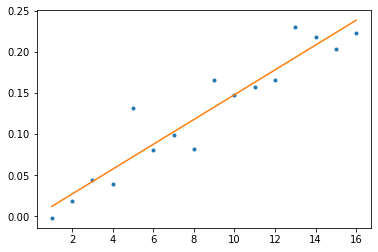

In [19]:
# mean plotting
benchmark_data = data
mean_lst = [benchmark_data[benchmark_data['threads']==i]['Overhead'].mean() for i in range(1,17)]

X = np.array([i for i in range(1,17)]).reshape((-1,1))
y = np.array(mean_lst)
model = LinearRegression().fit(X, y)
print("Slope: ", model.coef_[0])
print("Intercept", model.intercept_)

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
print("MSE: ", mse)
print("RNSE: ", rmse)
print("MAE: ", mae)

plt.plot([i for i in range(1,17)],mean_lst,'.', label="truth")
plt.plot(X, y_pred)
plt.show()

In [20]:
model.predict([[1]])

array([0.01225075])

In [21]:
model_path = "../src/overhead_model.joblib"
joblib.dump(model, model_path)

['../src/overhead_model.joblib']

MSE:  0.09360480543519638
RNSE:  0.3059490242429225
MAE:  0.1560231065221178


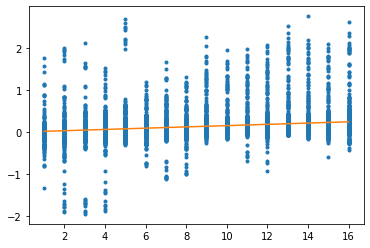

In [22]:
xx = data['threads']
yy = data['Overhead']

xx = np.array(xx).reshape((-1,1))
yy = np.array(yy)

yy_pred = model.predict(xx)

mse = mean_squared_error(yy, yy_pred)
rmse = mean_squared_error(yy, yy_pred, squared=False)
mae = mean_absolute_error(yy, yy_pred)
print("MSE: ", mse)
print("RNSE: ", rmse)
print("MAE: ", mae)

plt.plot(xx, yy,'.', label="truth")
plt.plot(xx, yy_pred)
plt.show()

In [23]:
data.drop(columns={'index'}).to_csv('../data/proprocessed_data_s_p_speedup.csv',index=False)